# Neuefische Data Science boot camp
---

## EDA-Project: King County home sales

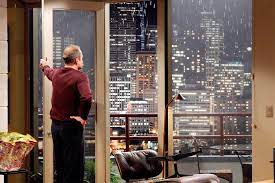

## Introduction



In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Stakeholder

William Rodriguez (Buyer) 	
#2 people, country (best timing & non-renovated) & city house (fast & central location), wants two houses

## Column Names and descriptions for King County Data Set

    id - unique identified for a house
    date - house was sold
    price - is prediction target
    bedrooms - # of bedrooms
    bathroomsNumber - # of bathrooms
    sqft_livingsquare - footage of the home
    sqft_lotsquare - footage of the lot
    floorsTotal - floors (levels) in house
    waterfront - House which has a view to a waterfront
    view - Has been viewed
    condition - How good the condition is ( Overall )
    grade - overall grade given to the housing unit, based on King County grading system
    sqft_above - square footage of house apart from basement
    sqft_basement - square footage of the basement
    yr_built - Built Year
    yr_renovated - Year when house was renovated
    zipcode - zip
    lat - Latitude coordinate
    long - Longitude coordinate
    sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [2]:
# reading in data
df=pd.read_csv("data/King_County_House_prices_dataset.csv")
df2=pd.read_csv("data/King_County_House_prices_dataset.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.shape

(21597, 21)

In [7]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Hypothesisis

* How to decide best timing? date vs price? date vs something else?
* yr_renovated has NaNs? Do they mean unkown? If so, they have to be marked as such and cannot be included in the country house
* how to decide what is countryside and what is city. City center as third option required?
* City house is required fast. So possible restrictions are less strict, price can be high?
* Assumption: 2 people working in the city but want to have a calm house on the country side for the weekends/holidays
* What to provide to stakeholder: best pricing, largest house, best with waterview, best condition
* probably city house does not need to be in such a good condition as the country house


## Data Cleaning

1. create column about renovation state (yes/no)
2. define country vs city by zip codes (manually)
3. convert date col into datetime objects
4. convert waterfront to integers: 1=waterfront 0=no waterfront 2=unknown
5. convert condition and view into integer. View received a 10 for NaN as unknown
6. convert zipcodes to string

In [8]:
# yr_renovated assumption: 0 and Na means no renovation
# yr_renovated remove Na and converted to integer
df2["yr2_renovated"]=df2["yr_renovated"].fillna(2)
df2["yr2_renovated"]=df2["yr2_renovated"].astype(int)

df2[["yr2_renovated","yr_renovated"]].head(10)


,yr2_renovated,yr_renovated
0,0,0.000
1,1991,1991.000
2,2,NaN
3,0,0.000
4,0,0.000
5,0,0.000
6,0,0.000
7,0,0.000
8,0,0.000
9,0,0.000


In [9]:
# get the col yn_renovated to show if or if not house has been ever renovated

renov_years=df2["yr2_renovated"].unique().astype(int)
#renov_years=renov_years[1:]
#renov_years=renov_years[2:]
#print(renov_years)
renov_years1=[1]*len(renov_years)
dict_reno=dict(zip(renov_years,renov_years1))
dict_reno[0]=0
dict_reno[2]=2
#print(dict_reno)

#df2["yn_renovated"]=df2["yr2_renovated"].map(dict_reno)
df2["yn_renovated"]=df2["yr2_renovated"].map(dict_reno)
print(df2[["yr2_renovated","yn_renovated"]].head(10))
#print(df2["yn_renovated"].unique())
#df2["yn_renovated"]=df2["yn_renovated"].astype(int,errors="ignore")
#df2

   yr2_renovated  yn_renovated
0              0             0
1           1991             1
2              2             2
3              0             0
4              0             0
5              0             0
6              0             0
7              0             0
8              0             0
9              0             0


In [25]:
# manually defined "country" vs "city" (the rest)
# 98070 is Vashon Island. Country or not?
zip_country=["98077","98019","98224","98288","98024","98014","98053","98065","98045","98027","98038","98022","98092","98042","98010","98051","98058","98059","98070"]
zip_city=df2.zipcode.unique()
print(zip_city)
zip_city=np.setdiff1d(zip_city, zip_country, assume_unique=False)
print(zip_country)
print(zip_city)
zip_country1=["country"]*len(zip_country)
zip_city1=["city"]*len(zip_city)

dict_country=dict(zip(zip_country,zip_country1))
dict_city=dict(zip(zip_city,zip_city1))


dict_zip={**dict_country,**dict_city}
#print(dict_zip)

# create col that defines city or country
df2["location"]=df2["zipcode"].map(dict_zip)
df2[["zipcode","location"]].head(10)

['98178' '98125' '98028' '98136' '98074' '98053' '98003' '98198' '98146'
 '98038' '98007' '98115' '98107' '98126' '98019' '98103' '98002' '98133'
 '98040' '98092' '98030' '98119' '98112' '98052' '98027' '98117' '98058'
 '98001' '98056' '98166' '98023' '98070' '98148' '98105' '98042' '98008'
 '98059' '98122' '98144' '98004' '98005' '98034' '98075' '98116' '98010'
 '98118' '98199' '98032' '98045' '98102' '98077' '98108' '98168' '98177'
 '98065' '98029' '98006' '98109' '98022' '98033' '98155' '98024' '98011'
 '98031' '98106' '98072' '98188' '98014' '98055' '98039']
['98077', '98019', '98224', '98288', '98024', '98014', '98053', '98065', '98045', '98027', '98038', '98022', '98092', '98042', '98010', '98051', '98058', '98059', '98070']
['98001' '98002' '98003' '98004' '98005' '98006' '98007' '98008' '98011'
 '98023' '98028' '98029' '98030' '98031' '98032' '98033' '98034' '98039'
 '98040' '98052' '98055' '98056' '98072' '98074' '98075' '98102' '98103'
 '98105' '98106' '98107' '98108' '98109'

,zipcode,location
0,98178,city
1,98125,city
2,98028,city
3,98136,city
4,98074,city
5,98053,country
6,98003,city
7,98198,city
8,98146,city
9,98038,country


In [26]:


zip_center=["98117","98107","98199","98119","98116","98136","98126","98106","98108","98118","98144","98134","98104","98101","98121","98109","98112","98122","98103","98195","98115","98105","98185","98102","90145","98124","98133","98125","98177"]
zip_city2=np.setdiff1d(zip_city, zip_center, assume_unique=False)
zip_city3=["city"]*len(zip_city2)
zip_center3=["center"]*len(zip_center)
#print(zip_city2)
#print(zip_city)

dict_country=dict(zip(zip_country,zip_country1))
dict_city2=dict(zip(zip_city2,zip_city3))
dict_center=dict(zip(zip_center,zip_center3))

dict_zip2={**dict_country,**dict_city2,**dict_center}

df2["location2"]=df2["zipcode"].map(dict_zip2)
#df2[["zipcode","location2"]].head(50)


In [12]:
# convert date col into datetime object
# create col y_sold for year and m_sold for month
df2["date"]=pd.to_datetime(df2["date"], format="%m/%d/%Y")
df2["y_sold"]=df2["date"].dt.year
df2["m_sold"]=df2["date"].dt.month
df2["ym_sold"]=df2["date"].dt.to_period("M")
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,yr2_renovated,yn_renovated,location,location2,y_sold,m_sold,ym_sold
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,-122.257,1340,5650,0,0,city,city,2014,10,2014-10
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,-122.319,1690,7639,1991,1,city,NaN,2014,12,2014-12
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,-122.233,2720,8062,2,2,city,city,2015,2,2015-02
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,-122.393,1360,5000,0,0,city,NaN,2014,12,2014-12
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,-122.045,1800,7503,0,0,city,city,2015,2,2015-02


In [13]:
# add col for price per sqrft_living and sqrft_lot
df2["price_living"]=df2["price"]/df2["sqft_living"]
df2["price_lot"]=df2["price"]/df2["sqft_lot"]
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,yr2_renovated,yn_renovated,location,location2,y_sold,m_sold,ym_sold,price_living,price_lot
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,5650,0,0,city,city,2014,10,2014-10,188.051,39.274
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7639,1991,1,city,NaN,2014,12,2014-12,209.339,74.289
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,8062,2,2,city,city,2015,2,2015-02,233.766,18.000
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,5000,0,0,city,NaN,2014,12,2014-12,308.163,120.800
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,7503,0,0,city,city,2015,2,2015-02,303.571,63.119


Comments: 

Waterfront has NaN also with waterfront according to map, so NaN is no guarantee that there is no waterfront
Na are converted to 2, as "unknown"


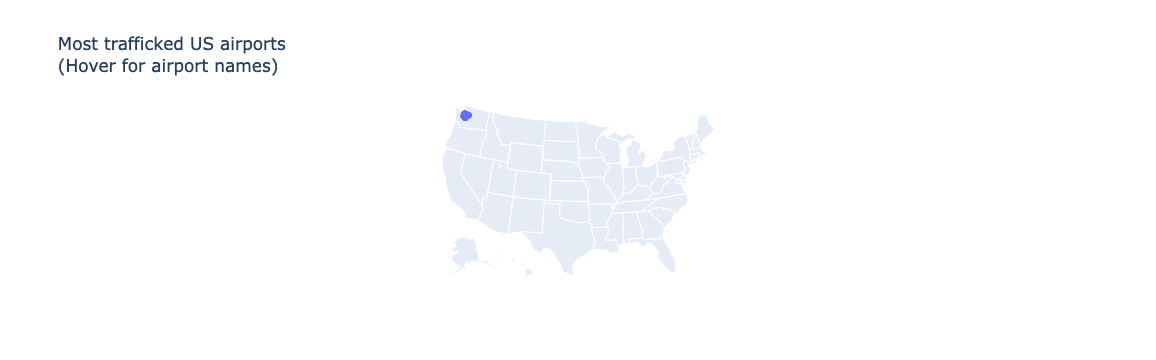

In [14]:
import plotly.express as px
import plotly.graph_objects as go

df3=df2[df2["waterfront"].isna()]
fig = go.Figure(data=go.Scattergeo(
        lon = df3['long'],
        lat = df3['lat'],
        #text = df['text'],
        mode = 'markers',
        #marker_color = df['cnt'],
        ))
fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo=dict(scope='usa',resolution=110)   
    )
fig.show()

In [15]:
# convert waterfront to integers: 1=waterfront 0=no waterfront 2=unknown

df2["waterfront"]=df2["waterfront"].astype(int,errors="ignore")
df2["waterfront"].unique()

array([nan,  0.,  1.])

In [16]:
# convert condition, view into integer
df2["condition"]=df2["condition"].astype(int,errors="ignore")
print(df2["condition"].unique())
# view has also NaN values, NaNs are converted to 10
df2["view"].fillna(10,inplace=True)
df2["view"]=df2["view"].astype(int,errors="ignore")
df2["view"].unique()

[3 5 4 1 2]


array([ 0, 10,  3,  4,  2,  1])

In [17]:
df2["zipcode"]=df2["zipcode"].astype(str)

## Data distributions

Text(0.5, 1.0, 'price_lot')

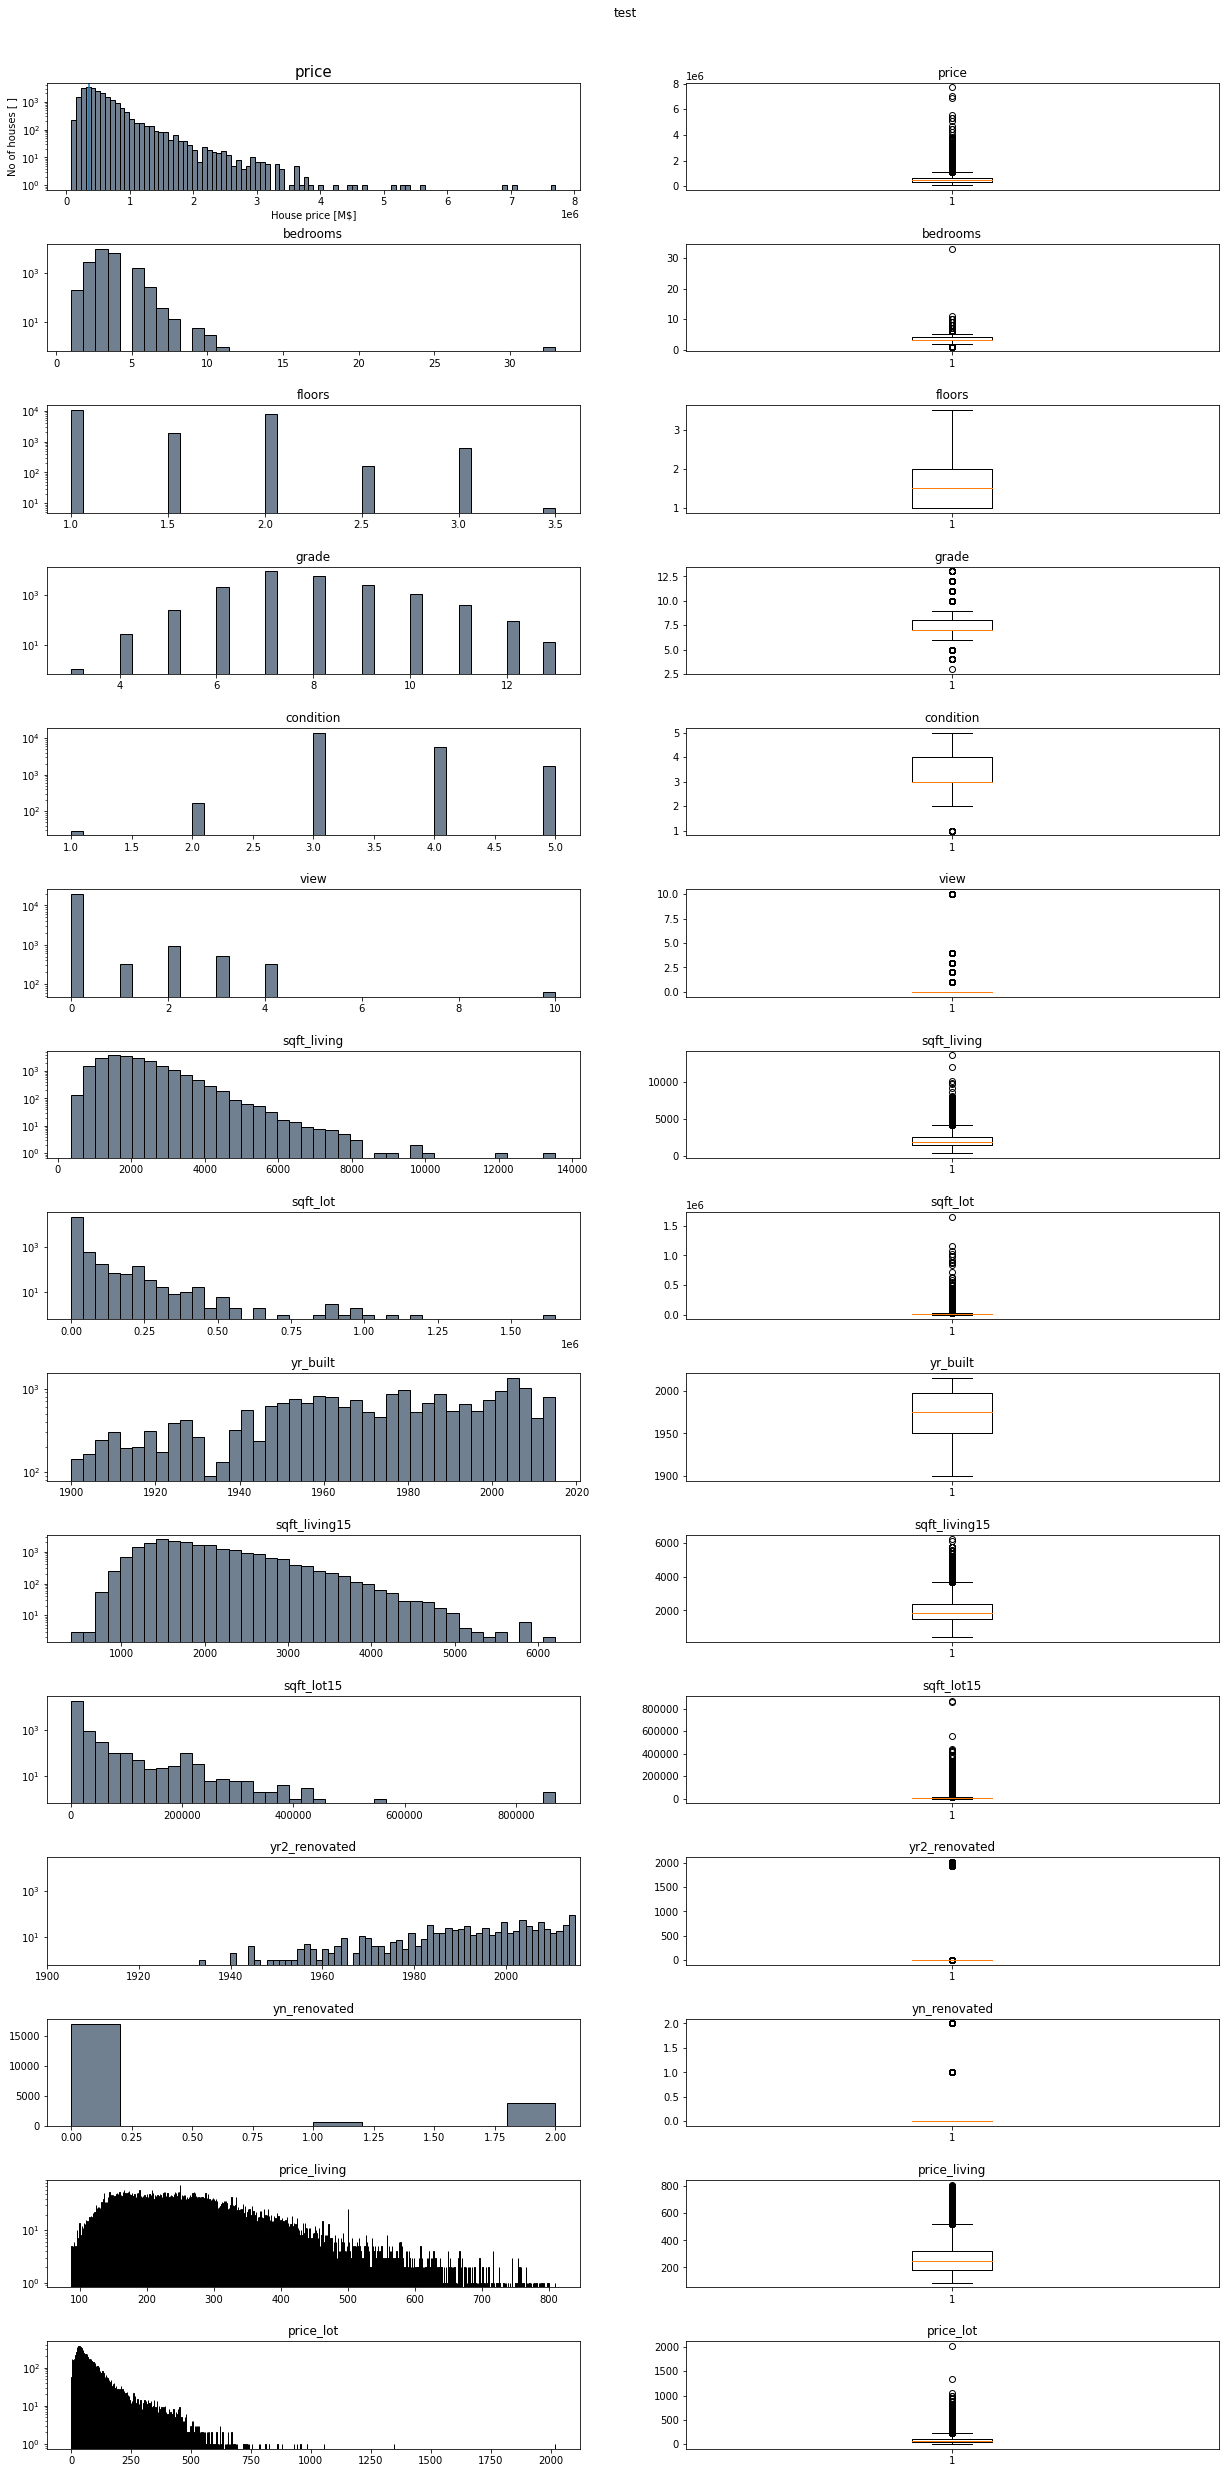

In [18]:


fig, axs = plt.subplots(ncols=2,nrows=15, constrained_layout=False,figsize=(17,35))
fig.suptitle("test")
fig.tight_layout()
plt.subplots_adjust(hspace = .5, wspace = .2, top=0.95)
barcol="slategray"
fontsizetitle=15
ed_col='k'

axs[0,0].hist(data=df2,x="price",bins=100, color=barcol, edgecolor=ed_col)
axs[0,0].set_title("price",fontsize=fontsizetitle)
axs[0,0].set_ylabel("No of houses [ ]")
axs[0,0].set_xlabel("House price [M$]")
axs[0,0].axvline(x=df2["price"].mode()[0])
axs[0,0].set_yscale("log")
axs[0,1].boxplot(data=df2,x="price")
axs[0,1].set_title("price")
#axs[0,1].set_yscale("log")

axs[1,0].hist(data=df2,x="bedrooms",bins=40, color=barcol, edgecolor=ed_col)
axs[1,0].set_title("bedrooms")
axs[1,0].set_yscale("log")
axs[1,1].boxplot(data=df2,x="bedrooms")
axs[1,1].set_title("bedrooms")

axs[2,0].hist(data=df2,x="floors",bins=40, color=barcol, edgecolor=ed_col)
axs[2,0].set_title("floors")
axs[2,0].set_yscale("log")
axs[2,1].boxplot(data=df2,x="floors")
axs[2,1].set_title("floors")

axs[3,0].hist(data=df2,x="grade",bins=40, color=barcol, edgecolor=ed_col)
axs[3,0].set_title("grade")
axs[3,0].set_yscale("log")
axs[3,1].boxplot(data=df2,x="grade")
axs[3,1].set_title("grade")

axs[4,0].hist(data=df2,x="condition",bins=40, color=barcol, edgecolor=ed_col)
axs[4,0].set_title("condition")
axs[4,0].set_yscale("log")
axs[4,1].boxplot(data=df2,x="condition")
axs[4,1].set_title("condition")

axs[5,0].hist(data=df2,x="view",bins=40, color=barcol, edgecolor=ed_col)
axs[5,0].set_title("view")
axs[5,0].set_yscale("log")
axs[5,1].boxplot(data=df2,x="view")
axs[5,1].set_title("view")

axs[6,0].hist(data=df2,x="sqft_living",bins=40, color=barcol, edgecolor=ed_col)
axs[6,0].set_title("sqft_living")
axs[6,0].set_yscale("log")
axs[6,1].boxplot(data=df2,x="sqft_living")
axs[6,1].set_title("sqft_living")

axs[7,0].hist(data=df2,x="sqft_lot",bins=40, color=barcol, edgecolor=ed_col)
axs[7,0].set_title("sqft_lot")
axs[7,0].set_yscale("log")
axs[7,1].boxplot(data=df2,x="sqft_lot")
axs[7,1].set_title("sqft_lot")

axs[8,0].hist(data=df2,x="yr_built",bins=40, color=barcol, edgecolor=ed_col)
axs[8,0].set_title("yr_built")
axs[8,0].set_yscale("log")
axs[8,1].boxplot(data=df2,x="yr_built")
axs[8,1].set_title("yr_built")

axs[9,0].hist(data=df2,x="sqft_living15",bins=40, color=barcol, edgecolor=ed_col)
axs[9,0].set_title("sqft_living15")
axs[9,0].set_yscale("log")
axs[9,1].boxplot(data=df2,x="sqft_living15")
axs[9,1].set_title("sqft_living15")

axs[10,0].hist(data=df2,x="sqft_lot15",bins=40, color=barcol, edgecolor=ed_col)
axs[10,0].set_title("sqft_lot15")
axs[10,0].set_yscale("log")
axs[10,1].boxplot(data=df2,x="sqft_lot15")
axs[10,1].set_title("sqft_lot15")

axs[11,0].hist(data=df2,x="yr2_renovated",bins=1500, color=barcol, edgecolor=ed_col)
axs[11,0].set_title("yr2_renovated")
axs[11,0].set_yscale("log")
axs[11,0].set_xlim([1900,2016])
axs[11,1].boxplot(data=df2,x="yr2_renovated")
axs[11,1].set_title("yr2_renovated")

axs[12,0].hist(data=df2,x="yn_renovated", color=barcol, edgecolor=ed_col)
axs[12,0].set_title("yn_renovated")
axs[11,0].set_yscale("log")
axs[12,1].boxplot(data=df2,x="yn_renovated")
axs[12,1].set_title("yn_renovated")

axs[13,0].hist(data=df2,x="price_living",bins=1500, color=barcol, edgecolor=ed_col)
axs[13,0].set_title("price_living")
axs[13,0].set_yscale("log")
#axs[13,0].set_xlim([1900,2016])
axs[13,1].boxplot(data=df2,x="price_living")
axs[13,1].set_title("price_living")

axs[14,0].hist(data=df2,x="price_lot",bins=1500, color=barcol, edgecolor=ed_col)
axs[14,0].set_title("price_lot")
axs[14,0].set_yscale("log")
#axs[14,0].set_xlim([1900,2016])
axs[14,1].boxplot(data=df2,x="price_lot")
axs[14,1].set_title("price_lot")


In [19]:
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,yr2_renovated,yn_renovated,y_sold,m_sold,price_living,price_lot
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21597.000,21597.000,...,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.262,3.410,...,47.560,-122.214,1986.620,12758.284,69.114,0.390,2014.323,6.574,264.143,88.989
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.928,0.651,...,0.139,0.141,685.230,27274.442,363.971,0.771,0.468,3.115,110.000,94.060
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,...,47.156,-122.519,399.000,651.000,0.000,0.000,2014.000,1.000,87.588,0.163
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,...,47.471,-122.328,1490.000,5100.000,0.000,0.000,2014.000,4.000,182.292,33.333
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,...,47.572,-122.231,1840.000,7620.000,0.000,0.000,2014.000,6.000,244.645,59.262
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,...,47.678,-122.125,2360.000,10083.000,0.000,0.000,2015.000,9.000,318.333,107.610
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,10.000,5.000,...,47.778,-121.315,6210.000,871200.000,2015.000,2.000,2015.000,12.000,810.139,2019.704


In [20]:
print(df2["price"].mode())
print(df2["price_living"].mode())
print(df2["price_lot"].mode())

0   350000.000
1   450000.000
dtype: float64
0   250.000
dtype: float64
0   100.000
dtype: float64


In [21]:
# amount of renovated/nonrenovated/unknown houses
df2.groupby(by="yn_renovated").count()["id"]

yn_renovated
0    17011
1      744
2     3842
Name: id, dtype: int64

## Descriptive statistics

* prices show left-skewed distribution with a long tail until almost 800K, and is best described with the mode at 350K
* price per squarefoot living is slightly left-skewed, mode is at 250
* price per squarefoot lot is extremely left-skewed, mode is at 100, with several outliers
* most houses has been renovated, only a about a fifth is not renovated

<AxesSubplot:xlabel='date', ylabel='price'>

<Figure size 864x432 with 0 Axes>

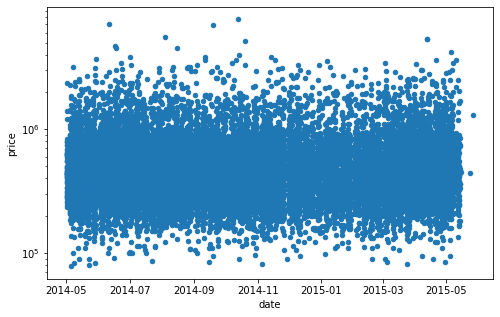

In [22]:
# Looking at contribution of date on price in order to display a trend for a best timing of byuing a house.
plt.figure(figsize=(12,6))

df2.plot(y="price",x="date",kind="scatter",logy=True)

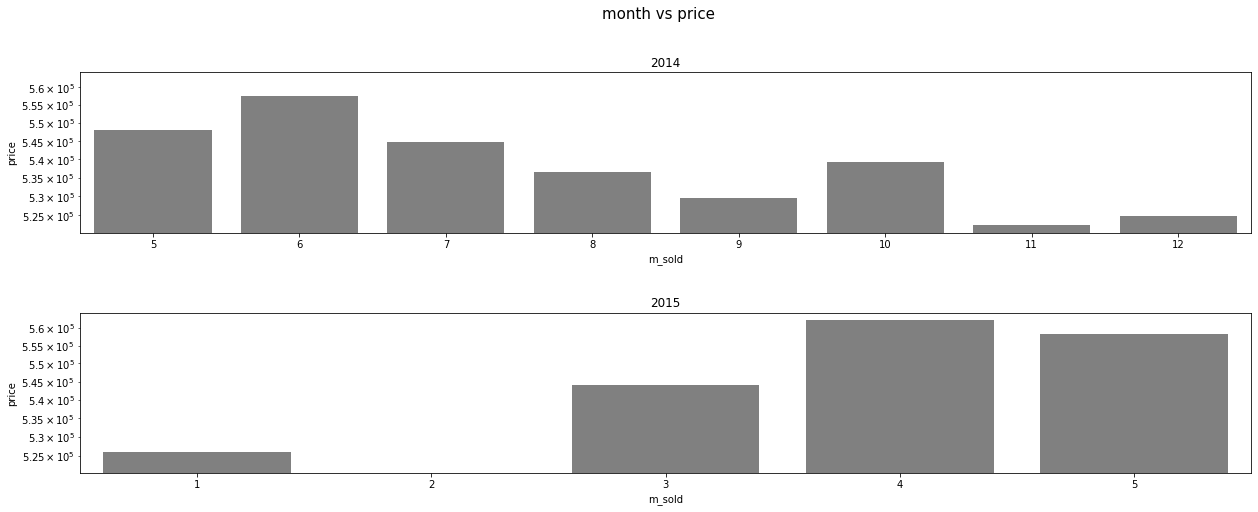

<Figure size 1224x504 with 0 Axes>

<Figure size 1224x504 with 0 Axes>

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(17, 7), sharey=True)
fig.suptitle("month vs price", fontsize=15)
fig.tight_layout()
plt.subplots_adjust(hspace = .5, wspace = .2, top=0.85)


df_price=df2.query('y_sold == 2014')
df_price=df_price.groupby(by="m_sold").mean()["price"].reset_index()

plt.figure(figsize=(17,7))
sns.barplot(ax=axes[0], data=df_price, x="m_sold", y="price",color="gray");
axes[0].set_yscale("log")
axes[0].set_title("2014");


df_price1=df2.query('y_sold == 2015')
df_price1=df_price1.groupby(by="m_sold").mean()["price"].reset_index()

plt.figure(figsize=(17,7))
sns.barplot(ax=axes[1], data=df_price1, x="m_sold", y="price",color="gray")
axes[1].set_title("2015");

ValueError: min() arg is an empty sequence

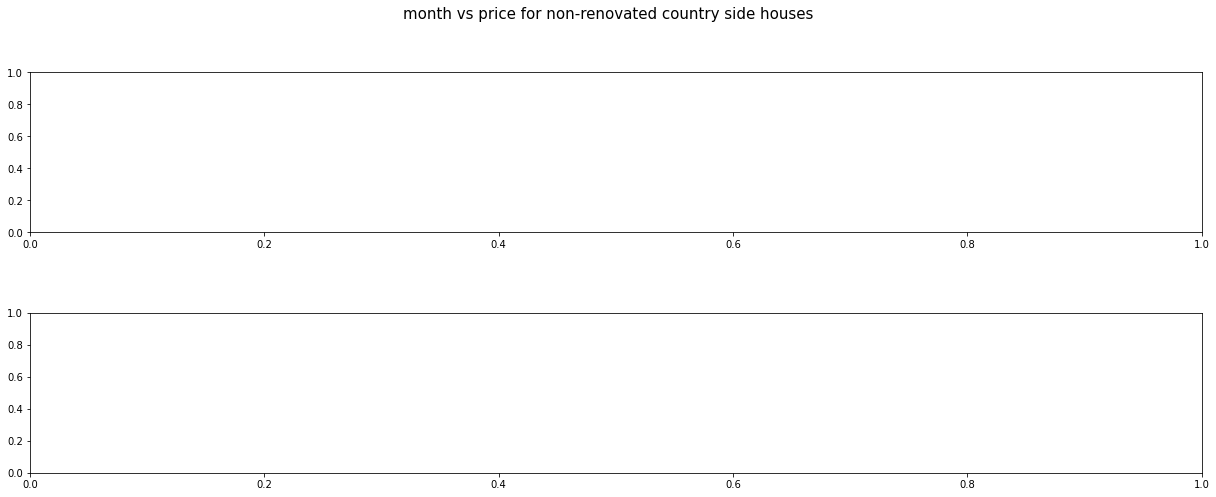

<Figure size 1224x504 with 0 Axes>

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(17, 7), sharey=True)
fig.suptitle("month vs price for non-renovated country side houses", fontsize=15)
fig.tight_layout()
plt.subplots_adjust(hspace = .5, wspace = .2, top=0.85)


df_price=df2.query('y_sold == 2014 and yn_renovated == 0 and location == "country"')
df_price=df_price.groupby(by="m_sold").mean()["price"].reset_index()

plt.figure(figsize=(17,7))
sns.barplot(ax=axes[0], data=df_price, x="m_sold", y="price",color="gray");
axes[0].set_yscale("log")
axes[0].set_title("2014");


df_price1=df2.query('y_sold == 2015 and yn_renovated == 0 and location == "country"')
df_price1=df_price1.groupby(by="m_sold").mean()["price"].reset_index()

plt.figure(figsize=(17,7))
sns.barplot(ax=axes[1], data=df_price1, x="m_sold", y="price",color="gray")
axes[1].set_title("2015");

In [ ]:
df_q1=df2.query('location == "country" and yn_renovated == 0')
df_q1=df_q1.groupby(by="m_sold").mean()["price"].reset_index()
plt.figure(figsize=(17,7))
plt.title("mean prise vs month for non-renovated houses in the country side")
sns.barplot( data=df_q1, x="m_sold", y="price",color="gray")
plt.yscale("log");


In [ ]:
df_q1=df2.query('location == "country" and yn_renovated == 0')
df_q1=df_q1.groupby(by="m_sold").median()["price"].reset_index()
plt.figure(figsize=(17,7))
plt.title("median prise vs month for non-renovated houses in the country side")
sns.barplot( data=df_q1, x="m_sold", y="price",color="gray")
plt.yscale("log");

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

df3=f_price1=df2.query(' yn_renovated == 0 and location == "country"')
fig = go.Figure(data=go.Scattergeo(
        lon = df3['long'],
        lat = df3['lat'],
        #text = df['text'],
        mode = 'markers',
        #marker_color = df['cnt'],
        ))
fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo=dict(scope='usa',resolution=110)   
    )
fig.show()

In [ ]:
plt.plot(df2.bathrooms)

## Data correlations

In [ ]:
sns.pairplot(df2[["price","bedrooms","bathrooms","floors","grade","condition","yn_renovated","sqft_lot15","sqft_living","sqft_lot","waterfront","price_living","price_lot"]],corner=True)

## Describing data by relationship of different parameters

Hypothesis and questions:
* There might be zip codes that are less present than other. Those are presumably the countryside houses. Are these the same as defined manually?
* Presumably in the countriside are the oldes houses. Is that so?
* City has the cheapest presumably? Is that true? Where is the villa with the 30 bedrooms?
* What is the best timing? price per month, quality per month?

In [ ]:

#pd.crosstab(df2.zipcode, df2.sqft_living,values=df2.price, aggfunc="mean")
sns.scatterplot(data=df2, x="zipcode", y="sqft_living",hue="price")

In [ ]:

df3=df2.sort_values(by="price_lot")
df3["zipcode"]=df3["zipcode"].astype(str)

plt.figure(figsize=(17,7))
sns.scatterplot(data=df3, x="zipcode", y="price_lot",hue="location", palette="magma_r")
plt.xticks(rotation=90);

In [ ]:
df3=df2.sort_values(by="price_living")
df3["zipcode"]=df3["zipcode"].astype(str)

plt.figure(figsize=(17,7))
sns.scatterplot(data=df3, x="zipcode", y="price_living",hue="location", palette="magma")
plt.xticks(rotation=90);

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(17, 7), sharey=True)
fig.suptitle('1 row x 2 columns axes with no data')


df3=df2.sort_values(by="price_lot")
df3["zipcode"]=df3["zipcode"].astype(str)

#plt.figure(figsize=(17,7))
sns.scatterplot(ax=axes[0],data=df3, x="zipcode", y="price_lot",hue="location", palette="magma_r")
plt.xticks(rotation=90);
#axes[0].set_xticklabels(rotation=90)

df3=df2.sort_values(by="price_living")
df3["zipcode"]=df3["zipcode"].astype(str)

#plt.figure(figsize=(17,7))
sns.scatterplot(ax=axes[1],data=df3, x="zipcode", y="price_living",hue="location", palette="magma")
#axes[1].set_xticklabels(rotation=90)
plt.xticks( rotation=90);

In [ ]:

plt.figure(figsize=(17,7))
sns.scatterplot(data=df2, x="zipcode", y="price_living",hue="grade", palette="viridis")
plt.xticks(rotation=90);

## Answering questions

### Renovation status in country side

In [ ]:
# showing the renovation status of
df_sub2=df2.query('location == "country" and (yn_renovated == 1 or yn_renovated == 0)')

fig = px.scatter_mapbox(df_sub2, lat="lat", 
                        lon="long", 
                        hover_name="id", 
                        color="yn_renovated",
                        color_discrete_map=px.colors.qualitative.G10)
                        #color_discrete_map=px.colors.qualitative.G10,
                        #color_discrete_map={"1":"red","2":"blue","0":"black"})
                       #title="test")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()
# requires that the color scale is descrete

In [ ]:
# price_living in counbtryside of non-renovated houses

df_sub1=df2.query('yn_renovated == 0 and location == "country"')

fig = px.scatter_mapbox(df_sub1, lat="lat", 
                        lon="long", 
                        hover_name="id", 
                        color="price_living", 
                        color_continuous_scale=px.colors.sequential.Plasma_r,
                       title="test")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()


### Best timing for non-renovated country side houses

In [ ]:
df_q1=df2.query('location == "country" and yn_renovated == 0')
#df_q1=df_q1.groupby(by="m_sold").median()["price"].reset_index()
plt.figure(figsize=(17,7))
plt.axvline(x=df_q1["price_living"].mean(), color="black")
plt.axvline(x=df_q1["price_living"].median(), color="red")
plt.axvline(x=df_q1["price_living"].mode()[0], color="green")
plt.text(135,340,"mode",color = "green")
plt.text(215,340,"median",color = "red")
plt.text(215,290,"mean",color = "black")
plt.title("Price per sqrft of living area (non-renovated, countryside)", fontsize=15)
sns.histplot( data=df_q1, x="price_living",color="gray")
plt.ylabel("counts [ ]",fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("price per sqft (living area) [\$/ft$^2$]",fontsize=15)
plt.yscale("log");

In [ ]:
df_q2=df2.query('location == "country" and yn_renovated == 0')
#df_q1=df_q1.groupby(by="m_sold").median()["price"].reset_index()
plt.figure(figsize=(17,7))

plt.axvline(x=df_q2["price_lot"].mean(), color="black")
plt.axvline(x=df_q2["price_lot"].median(), color="red")
plt.axvline(x=df_q2["price_lot"].mode()[0], color="green")
plt.text(2,390,"mode",color = "green")
plt.text(55,340,"median",color = "red")
plt.text(55,290,"mean",color = "black")
plt.title("Price per sqrft of lot area (non-renovated, countryside)", fontsize=15)
sns.histplot( data=df_q2, x="price_lot",color="royalblue",bins=100)
plt.ylabel("counts [ ]",fontsize=15)
plt.xlabel("price per sqft (lot area) [\$/ft$^2$]",fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale("log");

In [ ]:
df_q1=df2.query('location == "country" and yn_renovated == 0')
#df_q1=df_q1.groupby(by="m_sold").median()["price"].reset_index()
plt.figure(figsize=(17,7))
plt.axvline(x=df_q1["price"].mean(), color="black")
plt.axvline(x=df_q1["price"].median(), color="red")
plt.axvline(x=df_q1["price"].mode()[0], color="green")
plt.title("mean prise vs month for non-renovated houses in the country side", fontsize=15)
sns.histplot( data=df_q1, x="price",color="red")
plt.ylabel("counts [ ]",fontsize=15)
plt.xlabel("price per sqft (lot area) [\$/ft$^2$]",fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale("log");

In [ ]:

df_price2=df2.query(' yn_renovated == 0 and location == "country"')
df_price2=df_price2.groupby(by="ym_sold").median()["price_living"].reset_index()
#df_price2.ym_sold=df_price2.ym_sold.to_timestamp()
#df_price2
plt.figure(figsize=(17,7))
sns.barplot( data=df_price2, x="ym_sold", y="price_living",color="gray")
plt.yscale("log")
plt.title("Median price per sqrft of living area (non-renovated, countryside)",fontsize=15)
plt.ylabel("price per sqft (living area) [\$/ft$^2$]",fontsize=15)
plt.xlabel("time point sold [yyyy-mm]",fontsize=15)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=15);

In [ ]:

df_price2=df2.query(' yn_renovated == 0 and location == "country"')
df_price2=df_price2.groupby(by="ym_sold").median()["price_lot"].reset_index()
#df_price2.ym_sold=df_price2.ym_sold.to_timestamp()
df_price2
plt.figure(figsize=(17,7))
sns.barplot( data=df_price2, x="ym_sold", y="price_lot",color="royalblue")
plt.yscale("log")
plt.title("Median price per sqrft of lot area (non-renovated, countryside)",fontsize=15)
plt.ylabel("price per sqft (lot area) [\$/ft$^2$]",fontsize=15)
plt.xlabel("time point sold [yyyy-mm]",fontsize=15)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=15);

### Recommendation for city house

In [ ]:

df_sub1=df2.query(' location2 == "center"')

fig = px.scatter_mapbox(df_sub1, lat="lat", 
                        lon="long", 
                        hover_name="id", 
                        color="price_living", 
                        color_continuous_scale=px.colors.sequential.Plasma_r,
                       title="test")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

In [ ]:

df3=df2.sort_values(by="price_lot")
df3["zipcode"]=df3["zipcode"].astype(str)

plt.figure(figsize=(17,7))
sns.scatterplot(data=df3, x="zipcode", y="price_lot",hue="location2", palette="magma")
plt.xticks(rotation=90, fontsize=12)
plt.title("Price per sqrft of lot area by different locations",fontsize=15)
plt.ylabel("price per sqft (lot area) [\$/ft$^2$]",fontsize=15)
plt.xlabel("zip code",fontsize=15)

plt.yticks(fontsize=15);

In [ ]:
#which zip code in city center with price_lot < 300
df_price3=df2.query(' location2 == "center" and price_lot < 300 and grade > 3 and condition > 3 and yr_built > 1990')
df_price3["zipcode"].unique()
fig = px.scatter_mapbox(df_price3, lat="lat", 
                        lon="long", 
                        hover_name="id", 
                        #color="id", 
                        color_continuous_scale=px.colors.sequential.Plasma,
                       title="test")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

In [ ]:
#which zip code in city center with price_lot < 300
df_price3=df2.query(' location2 == "country" and grade > 4 and condition > 4 and yr_built > 1960 and yr_built < 1990 and yn_renovated == 0')
df_price3["zipcode"].unique()
fig = px.scatter_mapbox(df_price3, lat="lat", 
                        lon="long", 
                        hover_name="id", 
                        color="price_lot", 
                        color_continuous_scale=px.colors.sequential.Plasma,
                       title="test")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()


In [ ]:
df_price3

## Conclusion

## Outlook

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(17, 7), sharey=True)
fig.suptitle("month vs price for non-renovated country side houses", fontsize=15)
fig.tight_layout()
plt.subplots_adjust(hspace = .5, wspace = .2, top=0.85)


df_price=df2.query('y_sold == 2014 and yn_renovated == 0 and location == "country"')
df_price=df_price.groupby(by="m_sold").mean()["price"].reset_index()

plt.figure(figsize=(17,7))
sns.barplot(ax=axes[0], data=df_price, x="m_sold", y="price",color="gray");
axes[0].set_yscale("log")
axes[0].set_title("2014");


df_price1=df2.query('y_sold == 2015 and yn_renovated == 0 and location == "country"')
df_price1=df_price1.groupby(by="m_sold").mean()["price"].reset_index()

plt.figure(figsize=(17,7))
sns.barplot(ax=axes[1], data=df_price1, x="m_sold", y="price",color="gray")
axes[1].set_title("2015");